TODO: Add preprocessing(fit (white edges) in)

In [30]:
import cv2
import math
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import random

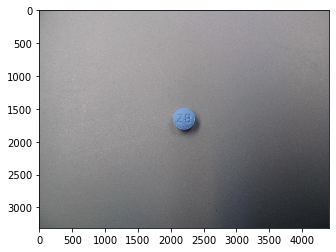

In [9]:
image = cv2.imread("../../Desktop/images/0.jpg")
plt.imshow(image)

In [12]:
p = Path("../../Desktop/images").glob("*")
files = [x for x in p if x.is_file()]
files

[PosixPath('../../Desktop/images/4322.jpg'),
 PosixPath('../../Desktop/images/2287.jpg'),
 PosixPath('../../Desktop/images/2347.jpg'),
 PosixPath('../../Desktop/images/2666.jpg'),
 PosixPath('../../Desktop/images/4281.jpg'),
 PosixPath('../../Desktop/images/2923.jpg'),
 PosixPath('../../Desktop/images/271.jpg'),
 PosixPath('../../Desktop/images/4492.jpg'),
 PosixPath('../../Desktop/images/1239.jpg'),
 PosixPath('../../Desktop/images/988.jpg'),
 PosixPath('../../Desktop/images/849.jpg'),
 PosixPath('../../Desktop/images/3232.jpg'),
 PosixPath('../../Desktop/images/1840.jpg'),
 PosixPath('../../Desktop/images/3323.jpg'),
 PosixPath('../../Desktop/images/4308.jpg'),
 PosixPath('../../Desktop/images/957.jpg'),
 PosixPath('../../Desktop/images/3236.jpg'),
 PosixPath('../../Desktop/images/35.jpg'),
 PosixPath('../../Desktop/images/4004.jpg'),
 PosixPath('../../Desktop/images/3908.jpg'),
 PosixPath('../../Desktop/images/1488.jpg'),
 PosixPath('../../Desktop/images/4827.jpg'),
 PosixPath('../.

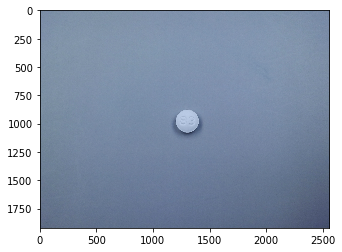

In [118]:
image = cv2.imread(str(files[7]))
plt.imshow(image)

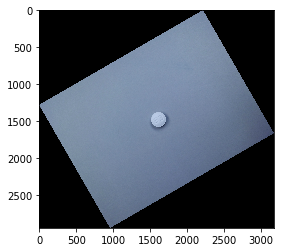

In [67]:
def rotate_image(image, angleInDegrees):
    h, w = image.shape[:2]
    img_c = (w / 2, h / 2)

    rot = cv2.getRotationMatrix2D(img_c, angleInDegrees, 1)

    rad = math.radians(angleInDegrees)
    sin = math.sin(rad)
    cos = math.cos(rad)
    b_w = int((h * abs(sin)) + (w * abs(cos)))
    b_h = int((h * abs(cos)) + (w * abs(sin)))

    rot[0, 2] += ((b_w / 2) - img_c[0])
    rot[1, 2] += ((b_h / 2) - img_c[1])

    outImg = cv2.warpAffine(image, rot, (b_w, b_h), flags=cv2.INTER_LINEAR)
    return outImg

angle = random.randint(5, 50)
plt.imshow(rotate_image(image, angle))

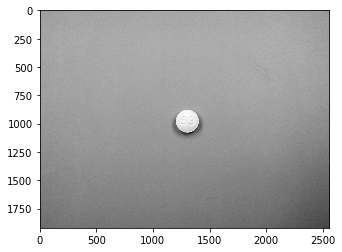

In [40]:
def image_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.imshow(image_to_grayscale(image), cmap='gray')

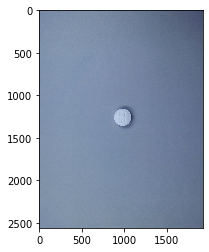

In [68]:
plt.imshow(rotate_image(image, 90))

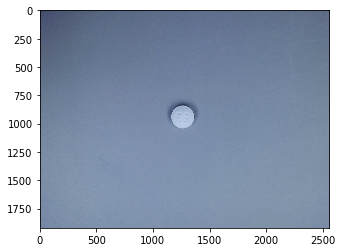

In [69]:
plt.imshow(rotate_image(image, 180))

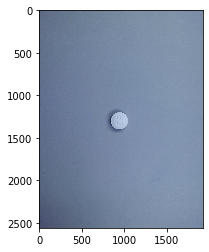

In [122]:
plt.imshow(rotate_image(image, 270))

In [127]:
def noisy(image):
    row,col,ch = image.shape
    s_vs_p = 0.5
    amount = 0.04
    out = image.copy()
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
    out[coords] = 0
    return out

/home/happy-unicorn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/home/happy-unicorn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


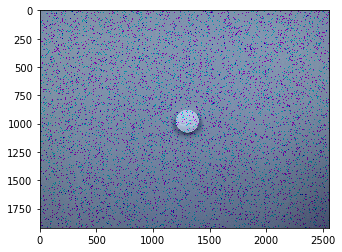

In [128]:
plt.imshow(noisy(image))

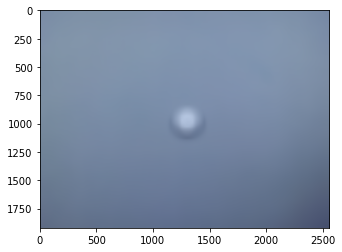

In [130]:
def blur(image):
    ksize = (100, 100)
    return cv2.blur(image, ksize)
    
    
plt.imshow(blur(image))